# TP2 : Estimation de densité par noyaux

## Introduction à l'estimation statistique - G3 SDIA

Dans le cadre de cours, nous avons étudié jusqu'à présent des méthodes d'estimation dites paramétriques : on se fixe une famille de lois paramétrique à laquelle la loi ayant généré les données est censée appartenir, puis on cherche à estimer les paramètres à partir des données (par exemple par maximum de vraisemblance).

Dans ce TP, nous introduisons une méthode d'estimation **non-paramétrique** de la fonction de densité appelée estimation par noyaux (*kernel estimation* en anglais). C'est-à-dire que nous ne faisons plus d'hypothèse sur la loi ayant généré les données, et nous cherchons plutôt à estimer directement la densité de la loi parente $f$ (que l'on supposera continue). Ainsi cette méthode ne concerne que les variables aléatoires continues.

### Instructions

1. Renommer votre notebook sous la forme `tp1_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 22 Octobre 2023, 23h59.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

### Partie 1 - Histogrammes

On considère $(x_1, ..., x_n)$ $n$ réalisations indépendantes d'une variable aléatoire réelle.

Soit $x_0 \in \mathbb{R}$ et $h > 0$. On partitionne la droite réelle en intervalles de même longueur $h$, aussi appelés *bins* :
$$\forall k \in \mathbb{Z},~B_k =~]x_0 + (k-1)h~;~x_0 + kh].$$

L'histogramme est une fonction constante par morceaux définie de la manière suivante :
$$\forall x \in B_k,~H_n(x) = n_k,$$
où $n_k$ est le nombre de réalisations appartenant à l'intervalle $B_k$.

**Q1**. Comment normaliser $H_n$ pour obtenir un estimateur de la fonction de densité ? On rappelera que $\int_{\mathbb{R}} f(x) dx = 1$.

Dans la suite, on note $\hat{f}_n$ cet estimateur de $f$.

Pour tout $x \in \mathbb{R}$, calculer le biais et la variance de $\hat{f}_n(x)$. Commenter.

**Pour que $H_n$ soit une fonction de desnité, il faut que $\int_{\mathbb{R}} H_n(x) dx = 1$. On a donc besoin de normaliser $H_n$ par $\int_{\mathbb{R}} H_n(x) dx = n h$ donc $\hat{f}_n(x) = \frac{H_n(x)}{n h}$.  
Vu que $n_k$ suit la loi binomiale de paramètre $n$ et $p_k$ = $\mathbb{P}(X \in B_k)$
Donc $$  \mathbb{E}[\hat{f}_n(x)] = \frac{1}{n h} \mathbb{E}[H_n(x)] = \frac{1}{h} \int_{B_k} f(t) dt = \frac{1}{h} \int_{x_0 + (k-1)h}^{x_0 + kh} f(t)dt \approx f(x)+ \frac{h}{2}f'(x)$$
Et $$\mathbb{V}[\hat{f}_n(x)] = \frac{1}{n^2 h^2} \mathbb{V}[H_n(x)] = \frac{1}{n h^2} \int_{B_k} f(t) (1 - f(t)) dt = \frac{1}{h^2} \int_{x_0 + (k-1)h}^{x_0 + kh} f(t) (1 - f(t)) dt \approx \frac{f(x)(1-f(x))}{h}    $$**

On remarque que le biais est de l'ordre de $h$ et la variance de l'ordre de $\frac{1}{h}$. Donc on a un compromis entre le biais et la variance. Si on prend $h$ petit, on a un biais grand et une variance petite et si on prend $h$ grand, on a un biais petit et une variance grande.

**Q2**. On fixe $x_0 = \min_i x_i$. La valeur de $h$ peut être fixée indirectement en fixant à la place le nombre de *bins* $N_b$ entre $\min_i x_i$ et $\max_i x_i$, on a alors
$$h = \frac{\max_i x_i - \min_i x_i}{N_b}.$$

Générer 200 points d'un modèle de mélange gaussien à 2 composantes avec $\mu_1 = -2.5, \mu_2 = 1.5, \sigma_1 = \sigma_2 = 1, \pi_1 = 0.4, \pi_2 = 0.6$.

Montrer l'influence de la valeur de $h$ sur l'histogramme (normalisé). On utilisera la fonction $\texttt{np.histogram}$ pour calculer automatiquement les $n_k$, et la fonction $\texttt{plt.bar}$ pour représenter $\hat{f}_n$. Superposer la densité théorique du modèle de mélange gaussien.

On pourra afficher plusieurs histogrammes obtenus avec différentes valeurs de $N_b$ à l'aide de $\texttt{plt.subplots}$. Commenter.

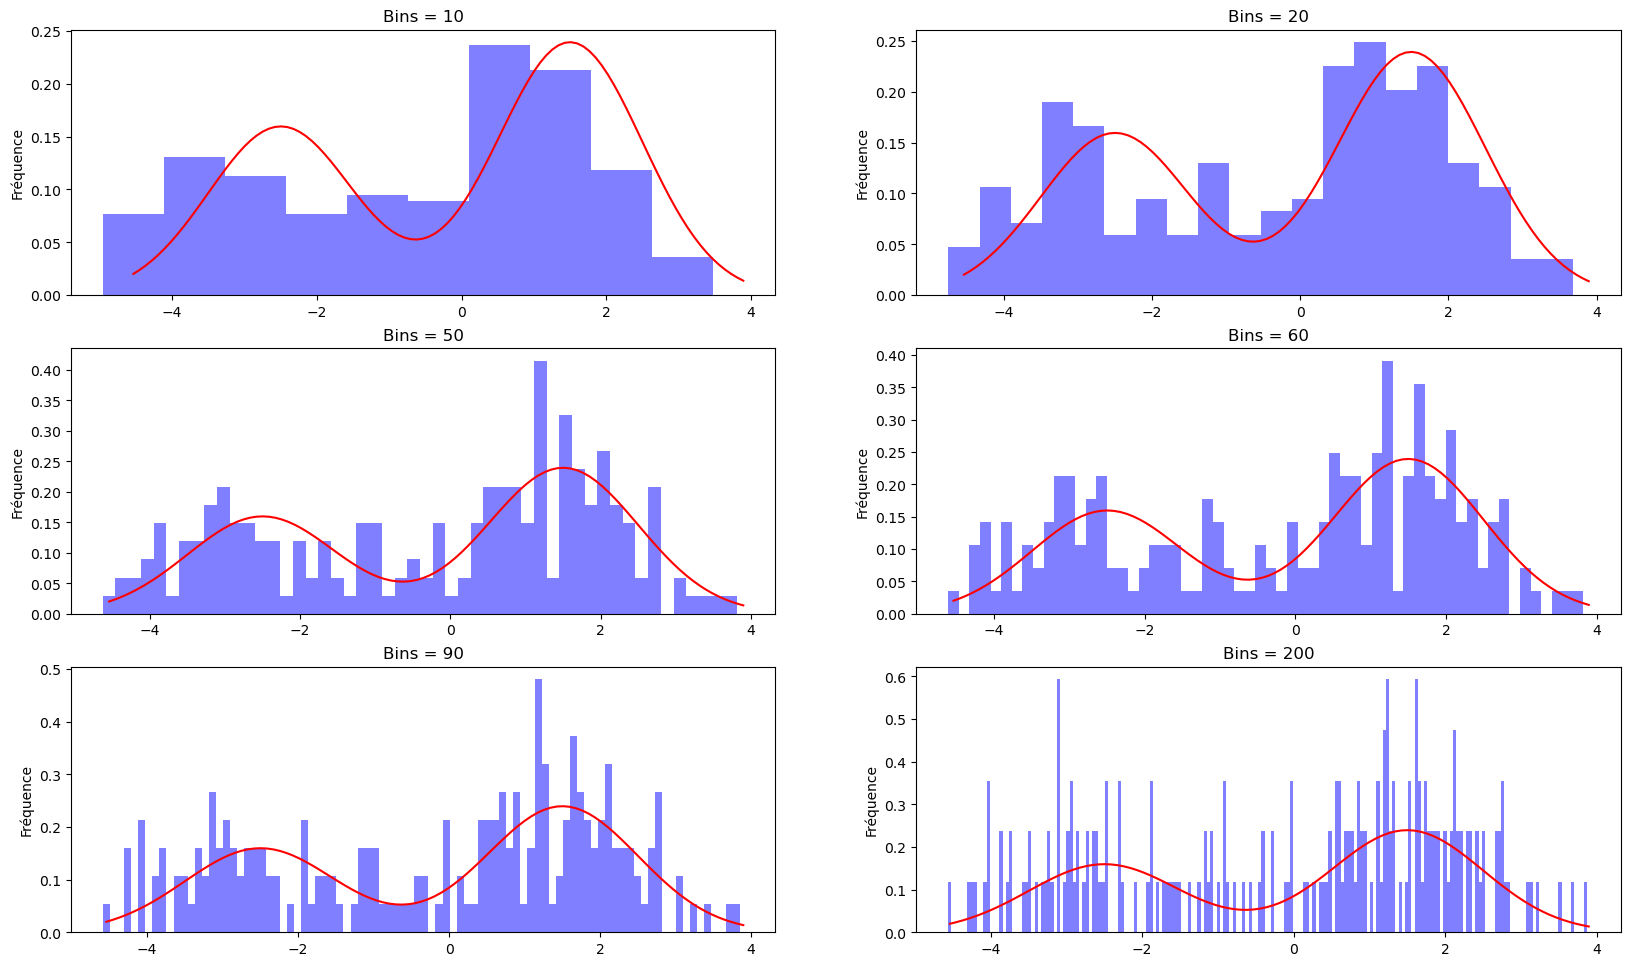

In [19]:
# Generate data from GMM

N = 200 
X = np.concatenate((np.random.normal(-2.5, 1, int(0.4 * N)),
                    np.random.normal(1.5, 1, int(0.6 * N))))
plt.figure(figsize=(20,20))
x = np.linspace(min(X),max(X),100)
fct_theorique = 0.4*ss.multivariate_normal.pdf(x,-2.5,1)+0.6*ss.multivariate_normal.pdf(x,1.5,1)

# Plot histograms with varying number of bins
i = 1
for N_b in [10,20,50,60,90,200]:
    Hist_val,bins = np.histogram(X,bins=N_b)
    axis = plt.subplot(5,2,i)
    h = (bins.max()-bins.min())/N_b
    axis.plot(x,fct_theorique,color ="red")
    axis.bar(bins[:-1],Hist_val/(N*h),width=h,color="blue",alpha=0.5)
    axis.set_title('Bins = ' + str(N_b))
    axis.set_ylabel('Fréquence')
    i += 1

*On observe que la précision de l'histogramme augmente à mesure que le nombre de bin $N_b$ devient plus grand. Cependant, si $N_b$ est excessivement élevé, l'histogramme devient excessivement réactif aux fluctuations de l'échantillon. Il est donc essentiel de sélectionner judicieusement la valeur de $N_b$. Cela correspond exactement à la variance de $\hat{f}_n(x)$ qui est inversement proportionnelle à $h$.*

**Q3**. Quelles sont les principales limitations de l'utilisation de l'histogramme comme estimateur de la fonction de densité ?

- Certaines observations sont "plus proches" des observations dans un bin voisin.
- L'estimation n'est pas *lisse*  (alors que de nombreuses fonctions de densité réelles sont souvent supposées *lisse*).
- Les décalages et la taille des bins peuvent avoir une influence significative sur la densité résultante.

### Partie 2 - Estimation par noyaux (en 1D)

$(x_1, ..., x_n)$ sont toujours $n$ réalisations indépendantes d'une variable aléatoire réelle.

L'une des motivations principales est de faire directement dépendre l'estimation des données, et de ne plus dépendre de découpages arbitraires de $\mathbb{R}$. Pour cela, on propose la méthodologie suivante :
- Choisir une fonction $K$ appelée "noyau". On choisit $K$ positive ou nulle, symétrique, et d'intégrale 1.
- Centrer $K$ sur chaque observation $x_i$.
- L'estimateur à noyaux est alors
$$\hat{f}_n(x) = \frac{1}{n} \sum_{i=1}^n K(x - x_i).$$

On pourra par exemple choisir des noyaux $K$ continus, dérivables partout... Propriétés dont $\hat{f}_n$ héritera.

**Q1**. On utilise dans un premier temps un noyau gaussien :
$$K(x) = \frac{1}{\sqrt{2 \pi}} \exp(-\frac{x^2}{2}).$$

Prendre 10 observations des données générées dans la partie 1. Sur un même graphique, représenter les 10 noyaux (normalisés par $n$) centrés sur les observations, et l'estimateur à noyaux $\hat{f}_n$. Superposer la vraie densité $f$. Commenter.

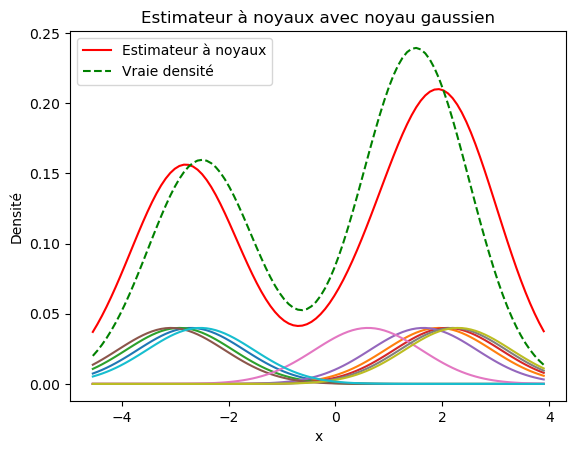

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

np.random.seed(1)
sample = np.random.choice(X, 10)
f_hat = np.zeros(len(x))
for xi in sample:
    fi = ss.multivariate_normal.pdf(x, xi, 1)/10
    plt.plot(x, fi)
    f_hat += fi

 
plt.plot(x, f_hat, label='Estimateur à noyaux', color='red')
plt.plot(x, fct_theorique, label='Vraie densité', linestyle='--', color='green')

plt.legend()
plt.xlabel('x')
plt.ylabel('Densité')
plt.title('Estimateur à noyaux avec noyau gaussien')
plt.show()


*Avec la méthode des noyaux, on parvient à obtenir une estimation de la densité plus lisse, en utilisant significativement moins de données. Ce succès découle du fait que, contrairement aux méthodes d'estimation classiques, les méthodes d'estimation par noyaux accordent davantage de poids aux observations qui sont proches de la valeur que l'on souhaite estimer. Cette approche plus ciblée s'avère plus robuste et permet d'obtenir des estimations plus précises de la densité.*

**Q2**. En réalité, on souhaite faire dépendre cet estimateur d'un paramètre de lissage $h > 0$, qu'on appelle largeur de fenêtre (ou *bandwidth* en anglais).

Le (véritable) estimateur à noyaux, aussi appelé méthode de Parzen-Rosenblatt (du nom des deux statisticiens l'ayant développée) est :
$$\hat{f}_n(x) = \frac{1}{nh} \sum_{i=1}^n K(\frac{x - x_i}{h}).$$

Vérifier que c'est bien l'estimateur d'une densité.

Implémenter cet estimateur sur les données de la partie 1, et montrer l'influence de la valeur de $h$. On pourra encore utiliser $\texttt{plt.subplots}$. Commenter.

L'estimateur $\hat{f}_n$ est une densité car:  $$\int_{\mathbb{R}} \hat{f}_n(x) dx =  \frac{1}{nh} \sum_{i=1}^n \int_{\mathbb{R}} K(\frac{x - x_i}{h}) dx = \frac{1}{nh} \sum_{i=1}^n h = \frac{1}{n} \sum_{i=1}^n 1 = 1$$ et $\hat{f}_n(x) \geq 0$ car $K$ est positive ou nulle.

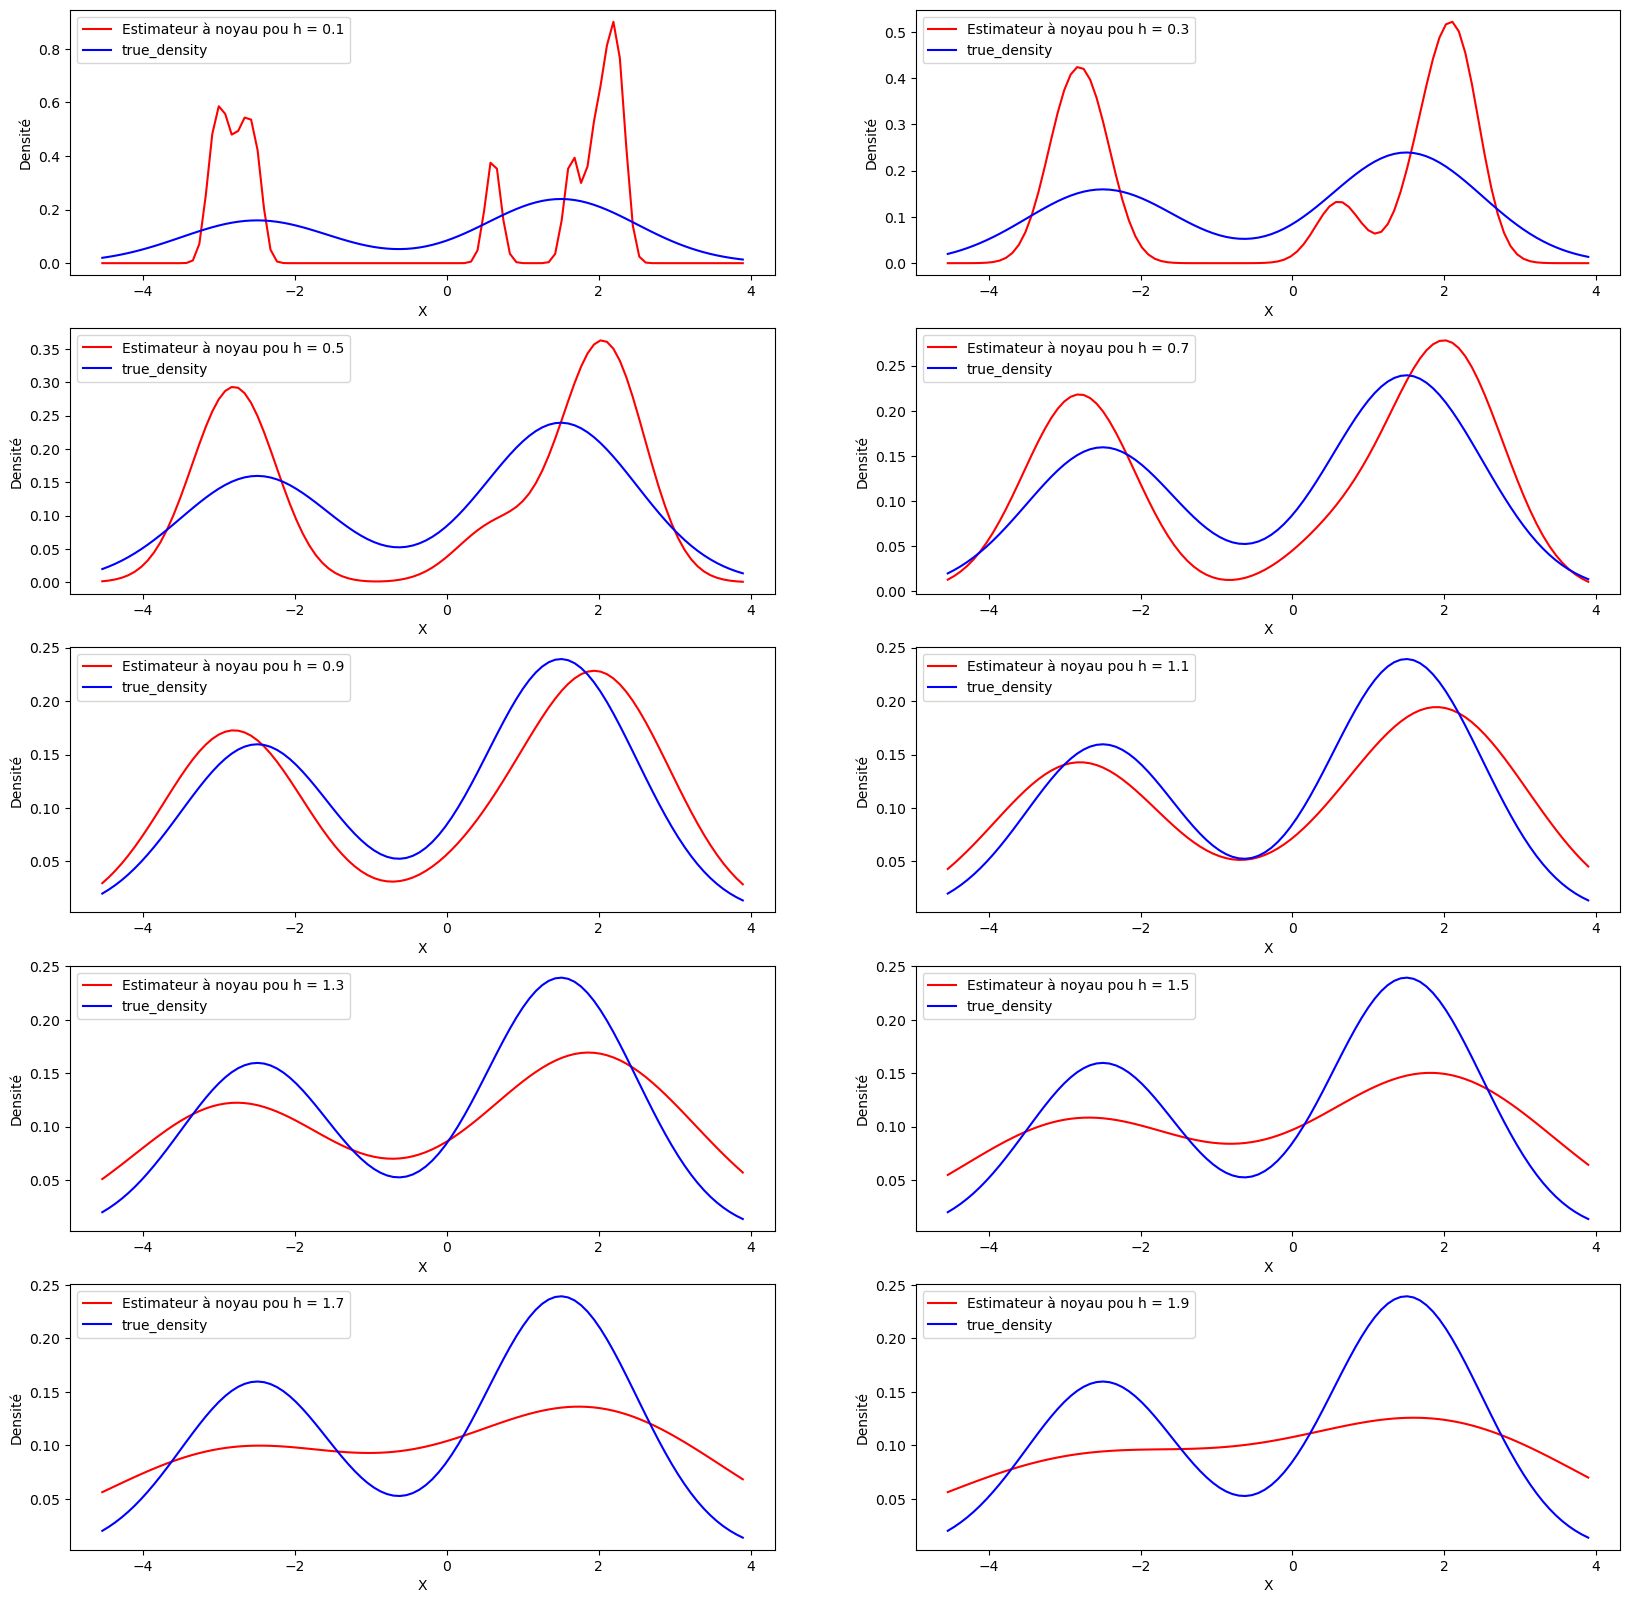

In [43]:
plt.figure(figsize=(20,20))
n = len(sample)
for h in range(1,20,2):
    axis = plt.subplot(5,2,int(h/2)+1)
    h = h/10
    f_hat_h = 1/(n*h)*sum(1/(np.sqrt(2*np.pi)) * np.exp(-(1/2)*((x-sample[i])/h)**2) for i in range(len(sample)))
    axis.plot(x,f_hat_h,color="red",label = f"Estimateur à noyau pou h = {h}")
    axis.plot(x,fct_theorique,color="blue",label ="true_density")
    axis.legend()
    plt.xlabel("X")
    plt.ylabel("Densité")

Le choix du paramètre $h$ dans l'estimateur à noyaux est crucial. Si $h$ est trop petit (par exemple, $h$ = 0.1), l'estimation peut être trop détaillée, avec des artefacts. Si $h$ est trop grand (par exemple, h = 1.9), l'estimation devient trop lisse, supprimant les caractéristiques de la distribution. Il est nécessaire de trouver un équilibre.

Mathématiquement, on sait que une augmentation de h réduit la variance de l'estimateur (variance proportionnelle à $1/h$) mais peut augmenter le biais (biais proportionnelle à  $h^2$), tandis qu'une diminution de h augmente la résolution mais peut introduire plus de varaince.

Le choix de la valeur optimale de h dépend des données et des objectifs. Des essais avec différentes valeurs de h sont courants pour trouver le bon compromis entre précision et lissage, en évitant le surajustement ou la sous-estimation.

**Q3.** Nous allons maintenant regarder d'autres noyaux. Cette fois-ci, nous n'implémenterons pas l'estimateur à la main mais ferons appel à la librairie `scikit-learn` qui implémente six noyaux différents (dont le noyau gaussien). La méthode est implémentée dans `sklearn.neighbors.KernelDensity`.

Représenter les six noyaux. Commenter.

À longueur de fenêtre fixée (par exemple $h = 0.5$), montrer l'influence des différentes fenêtres. On pourra encore utiliser $\texttt{plt.subplots}$. Commenter.

In [45]:
from sklearn.neighbors import KernelDensity

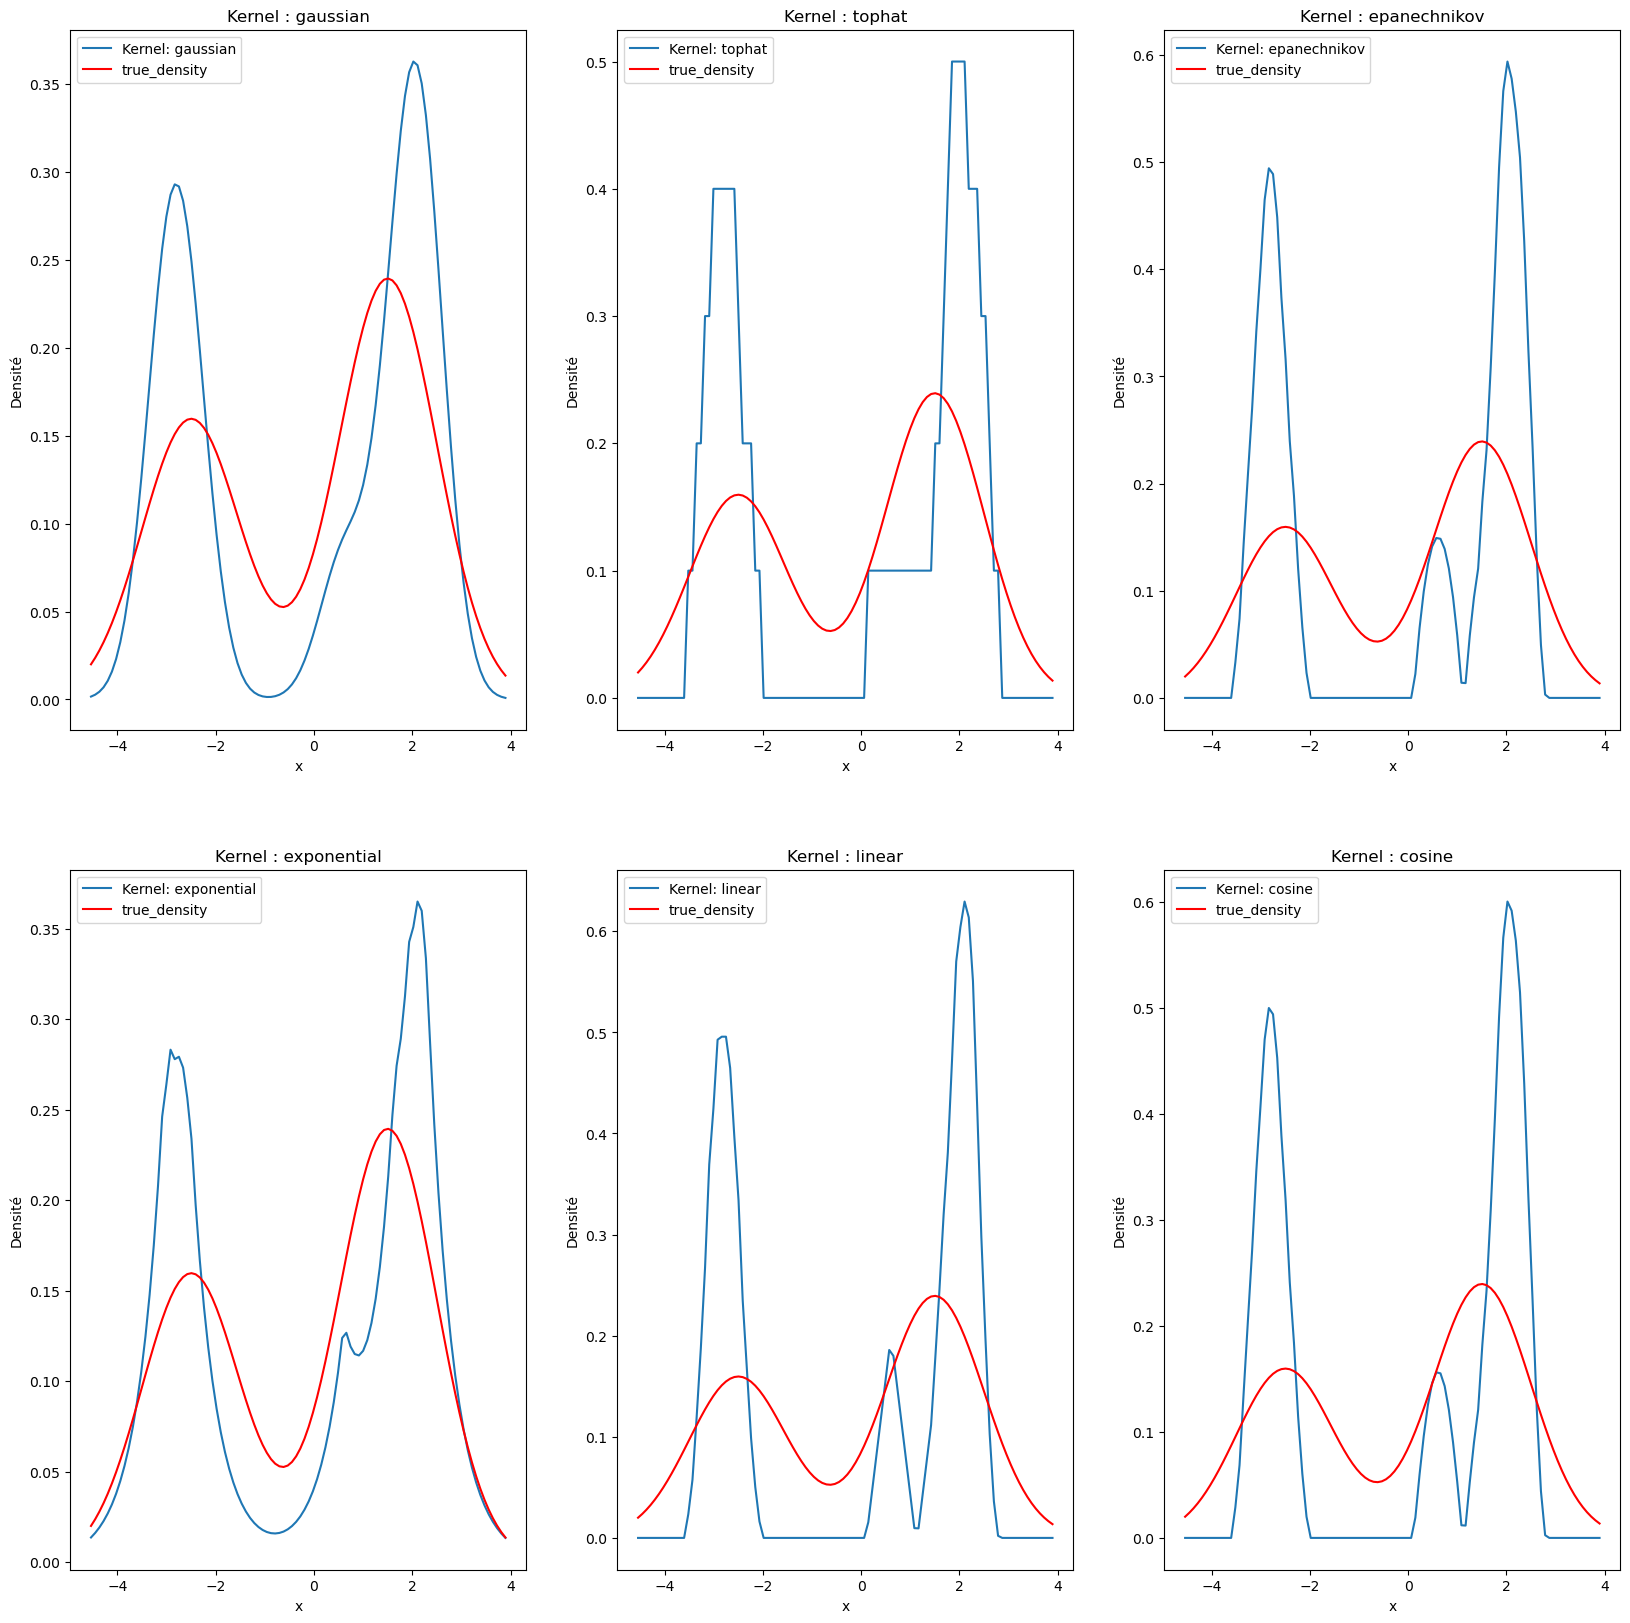

In [47]:
# Liste des noyaux disponibles dans scikit-learn
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
h = 0.5
plt.figure(figsize=(20,20))
for i,kernel in enumerate(kernels):
    axis = plt.subplot(2,3,i+1)
    kde = KernelDensity(kernel=kernel, bandwidth=h)
    kde.fit(sample.reshape(-1,1))
    log_dens = kde.score_samples(x.reshape(-1, 1))
    axis.plot(x, np.exp(log_dens), label=f'Kernel: {kernel}')
    axis.plot(x,fct_theorique,color="red",label ="true_density")
    plt.title(f"Kernel : {kernel}")
    plt.xlabel("x")
    plt.ylabel("Densité")
    axis.legend()


On remarque que le choix du noyau influence trop l'estimation de la densité , ici le meilleur noyau qui s'approche de notre vraie densité est le noyau gaussien ce qui est totalement naturel vu que la nature de notre densité est gaussienne. Pour les autres noyaux on voit qu'ils arrivent à reproduire la meme forme que notre noyau mais avec des formes hériter du noyau utilisé.

Pour choisir un bon noyau il faut savoir un minimum de propriétés sur la distribution qu'on veut estimer afin de choisir un noyau qui est de meme nature que notre densité.

**Q4 (bonus)**. La question du choix de $h$ a été largement étudiée dans la littérature. Par exemple, la librairie `scikit-learn` embarque pour l'argument *bandwidth* deux règles de calcul empiriques appelées règle de Scott et règle de Silvermann, qui fixent la valeur de $h$ en fonction de $n$ et $d$ (la dimension des données).

À l'aide d'une notion du cours, pouvez-vous imaginer un critère d'optimalité permettant de fixer la valeur de $h$ ?

*Une idée est d'utiliser la validation croisée. On peut par exemple utiliser la validation croisée à $k$ blocs. On divise l'échantillon en $k$ blocs de taille égale. On estime la densité sur $k-1$ blocs, et on calcule la log-vraisemblance sur le bloc restant. On répète l'opération pour chaque bloc, et on moyenne les log-vraisemblances. On choisit alors la valeur de $h$ qui maximise la log-vraisemblance moyenne.*

### Partie 3 : Estimation par noyaux (en 2D)

L'estimation de densité par noyaux peut être étendue en $d$ dimensions. On peut alors définir $\mathbf{H}$ une matrice symmétrique de taille $d \times d$ définie positive pour les longueurs de fenêtres (NB : `scikit-learn` ne le permet pas et n'a qu'un paramètre scalaire en $d$ dimensions).

**Q1**. Reprendre le dataset *Old Faithful* étudié au TP1, et faire une estimation par noyaux de la densité en utilisant `scikit-learn`. Le choix du noyau et de la longueur de fenêtre est laissé libre.

Afficher la densité obtenue. On pourra par exemple la représenter sous forme de *heatmap* avec $\texttt{plt.imshow}$, ou bien sous la forme d'un *surface plot* (ex. : https://matplotlib.org/stable/gallery/mplot3d/surface3d.html). Commenter.

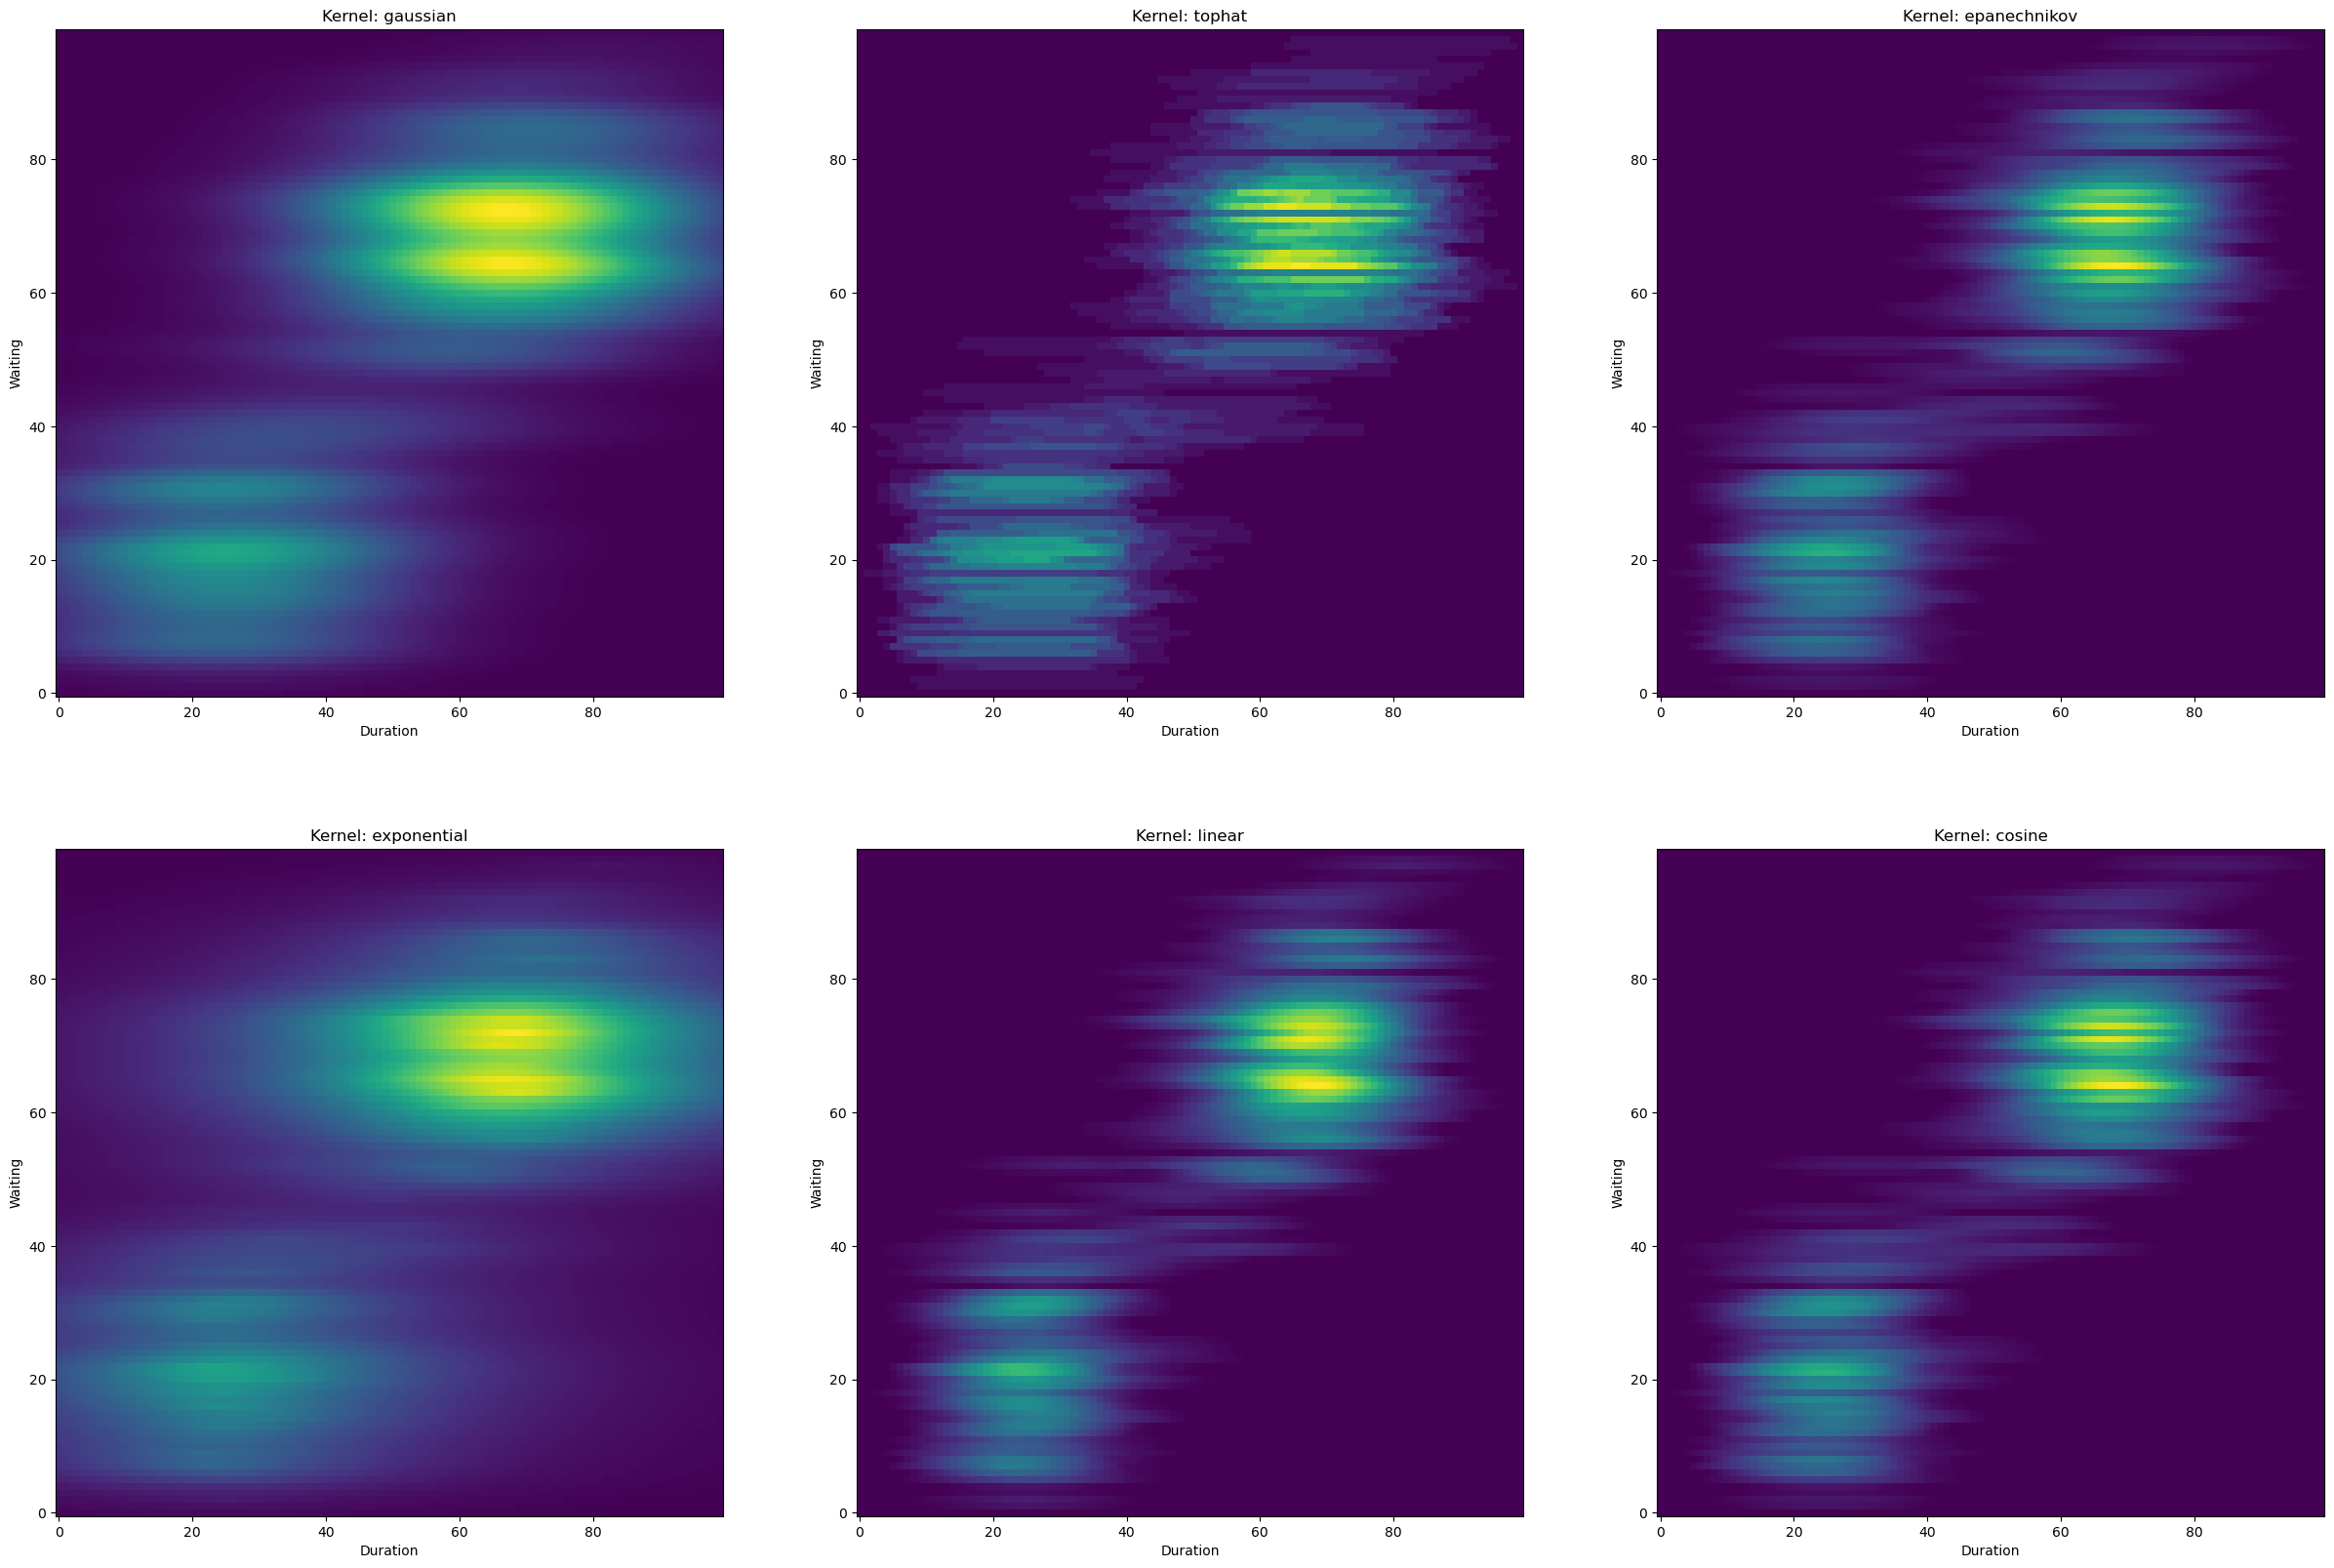

In [56]:
import seaborn
df = seaborn.load_dataset('geyser')
X = df[['duration', 'waiting']].values

# Choose a kernel and bandwidth (window length)
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
bandwidth = 1.0 

# Create a grid of points for density estimation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
i = 0
plt.figure(figsize=(30,20))
for kernel in kernels:
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(X)
    # Calculer la  log-density pour les points  points
    log_dens = kde.score_samples(grid_points)
    # redimentionner les valeurs de notre densité 
    density = np.exp(log_dens).reshape(xx.shape)

    axis = plt.subplot(2,3,i+1)
    # Représenter la densité comme un  heatmap
    axis.imshow(density, origin='lower')
    #plt.colorbar(label='Densité')
    axis.set_xlabel('Duration')
    axis.set_ylabel('Waiting')
    axis.set_title(f'Kernel: {kernel}')
    i+=1
plt.show()


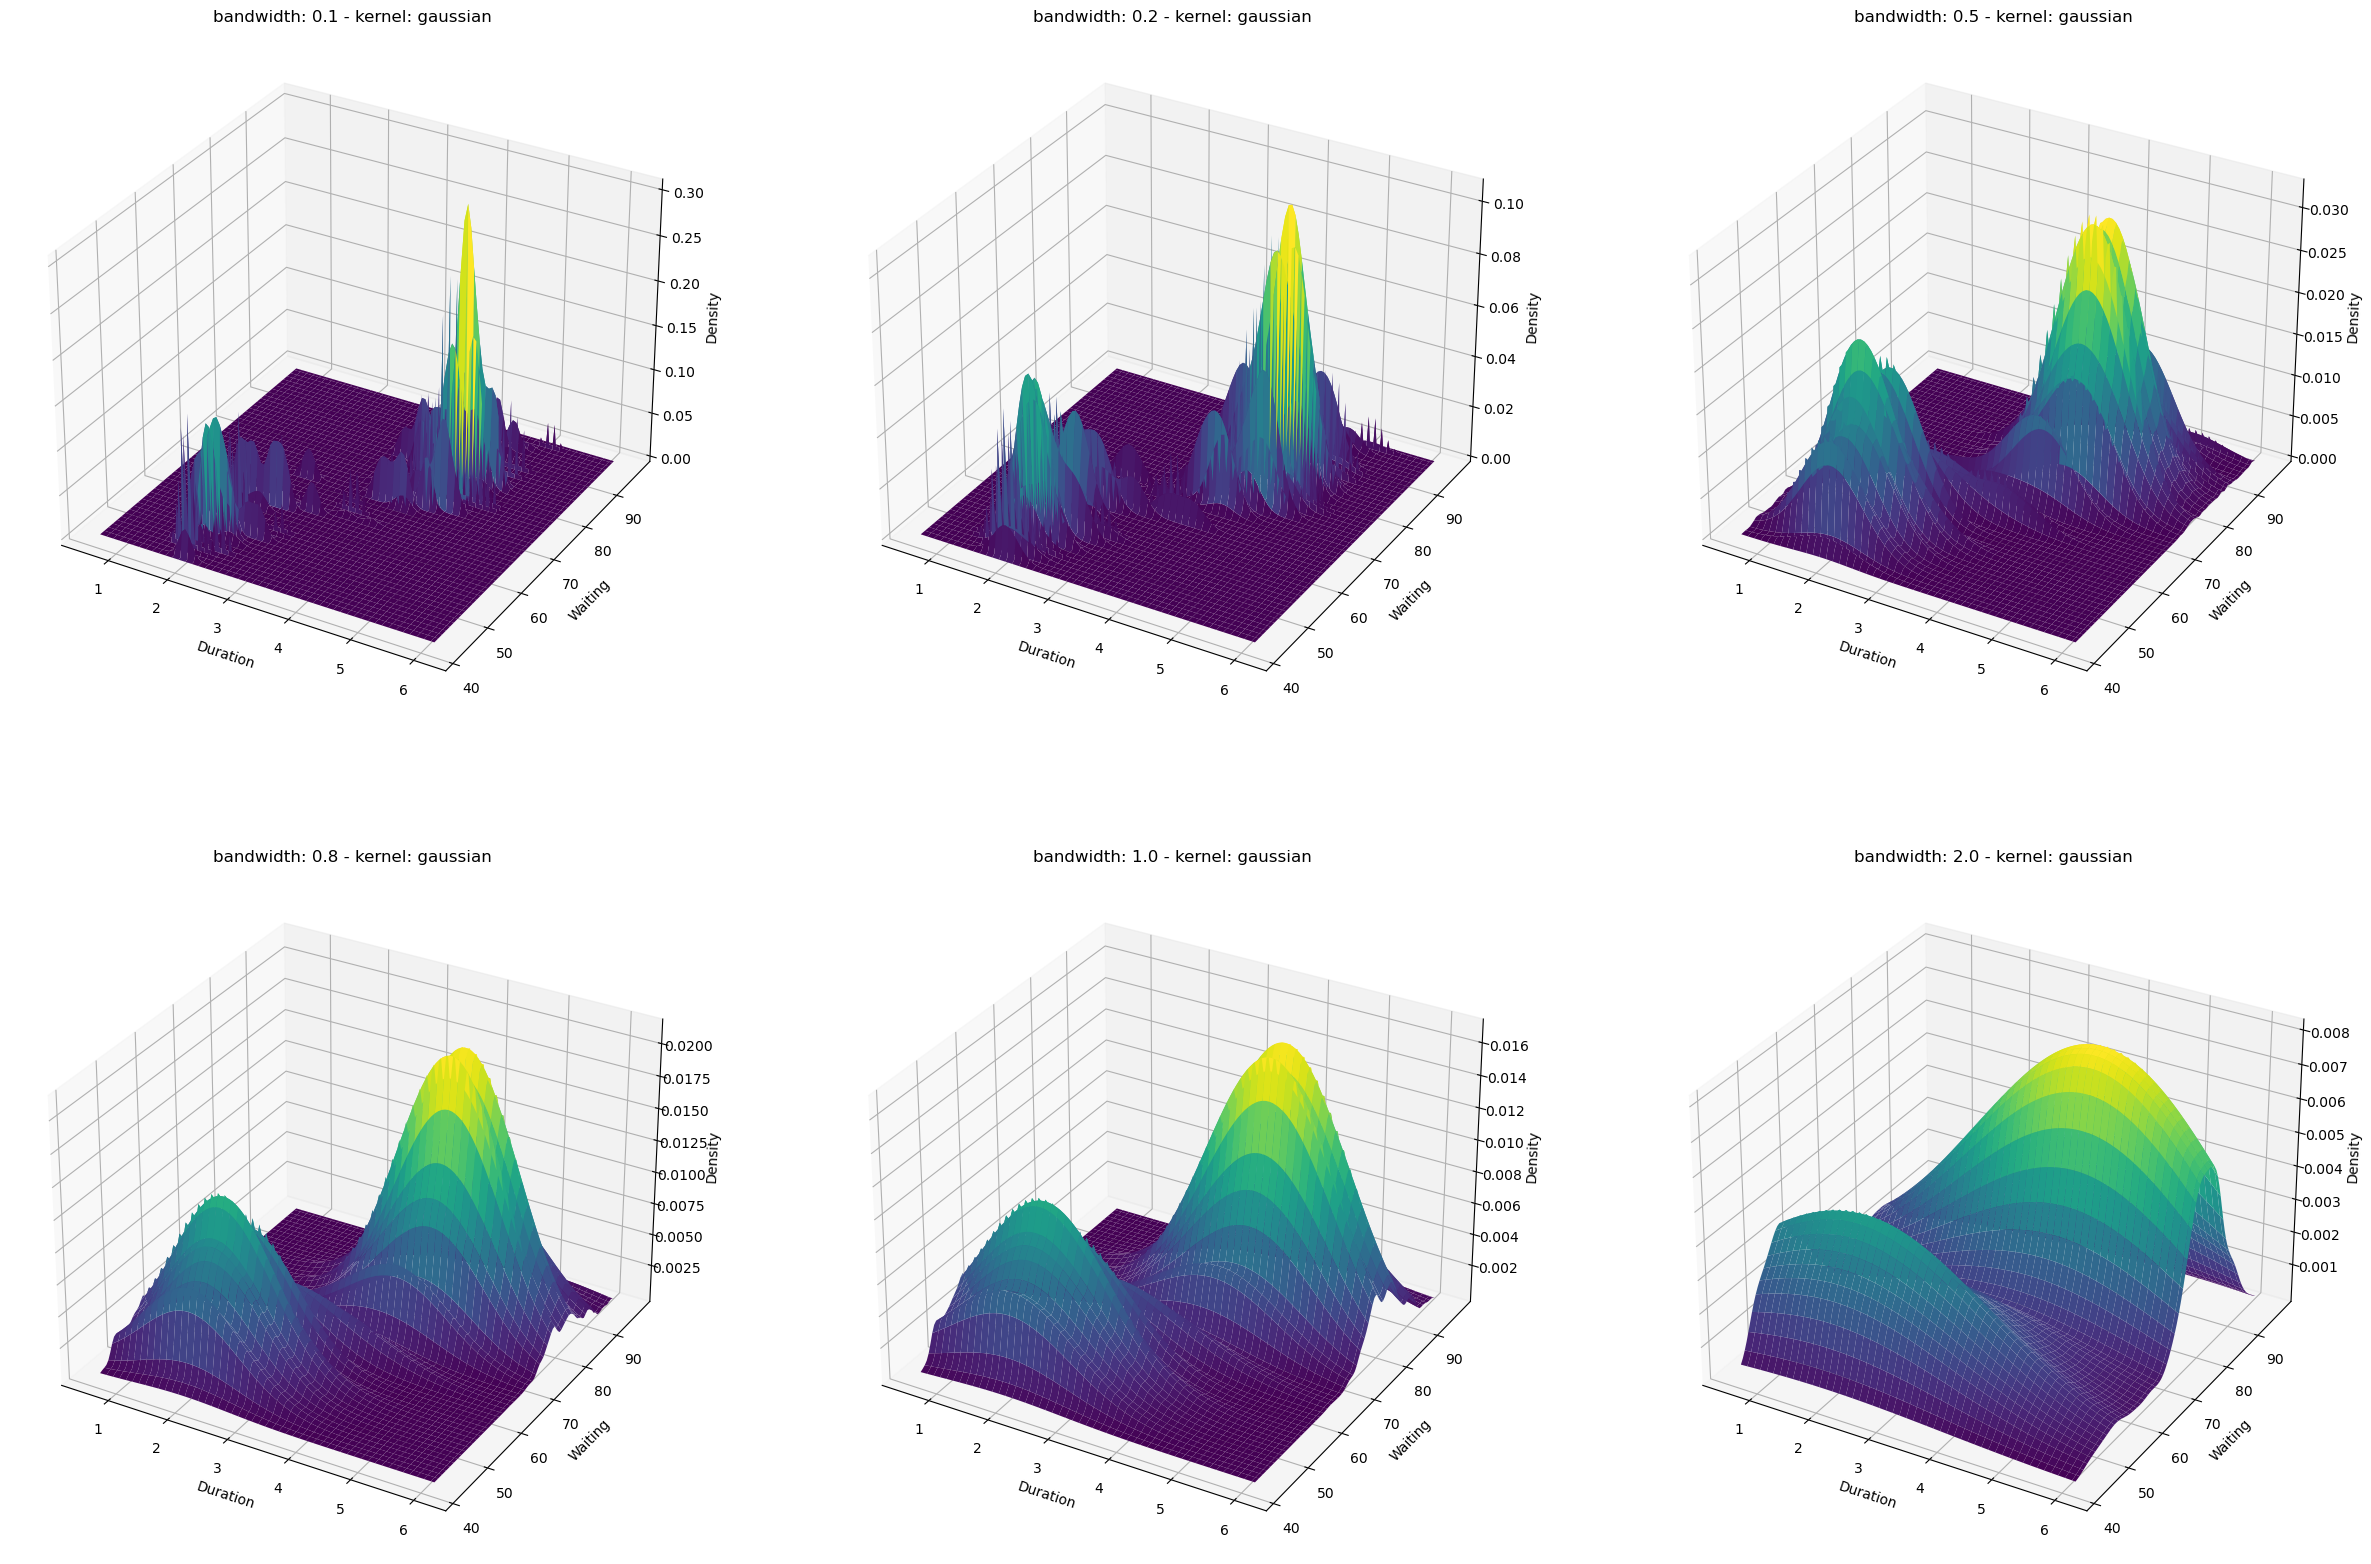

In [61]:
import seaborn
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np

df = seaborn.load_dataset('geyser')
X = df[['duration', 'waiting']].values

# Choose a kernel and bandwidth (window length)
kernel = 'gaussian'
bandwidth = [0.1,0.2,0.5,0.8,1.0,2.0]

# Create a grid of points for density estimation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

i = 0
fig = plt.figure(figsize=(30, 20))

for h in bandwidth:
    kde = KernelDensity(kernel=kernel, bandwidth=h)
    kde.fit(X)
    
    # Calculate the log-density for the grid points
    log_dens = kde.score_samples(grid_points)
    # Reshape the density values
    density = np.exp(log_dens).reshape(xx.shape)
    
    # Create a 3D plot
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.plot_surface(xx, yy, density, cmap='viridis')
    ax.set_xlabel('Duration')
    ax.set_ylabel('Waiting')
    ax.set_zlabel('Density')
    ax.set_title(f'bandwidth: {h} - kernel: {kernel}')
    i += 1

plt.show()



*On voit sur les deux représentations qu'on arrive à voir deux nuages de points ce qui correspond aux résultats qu'on a trouvé dans le tp 1 et ceci indépendament de la nature de noyaux ou sa largeur. Cependant on remarque que le noyau gaussien est le meilleur noyau qui s'approche de notre vraie densité.*
Il faut noter aussi que les memes remaques qu'on a fait dans la partie 2 sont valables ici.

### Partie 4 : Estimation par noyaux (en 64D !) -- Un modèle génératif

Une fois la fonction de densité estimée par noyaux, nous pouvons facilement échantillonner de cette loi. Ceci nous permet donc de générer "de fausses données". C'est ce que nous allons mettre en oeuvre sur un exemple simple avec des images. Estimer la densité nous permettra donc de créer un générateur d'images.

**Q1 (bonus)**. Dans le cas d'un noyau gaussien, expliquer pourquoi il est facile d'échantillonner de la densité estimée.

**Q2.** Dans cette dernière partie, nous considérons le cas où nos données représentent des images. Nous utiliserons le dataset *Digits* qui contient environ 1700 imagettes en niveaux de gris de taille 8 par 8, qui peuvent donc être représentées comme des vecteurs de taille 64. Ces imagettes représentent des numéros scannés de codes postaux.

- Estimer par noyaux de la densité en utilisant `scikit-learn`. Le choix du noyau et de la longueur de fenêtre est laissé libre.
- Échantillonner 10 nouvelles images de la loi estimée. On utilisera $\texttt{kde.sample}$
- Afficher 10 images tirées du dataset, puis les 10 images générées. Commenter.

 

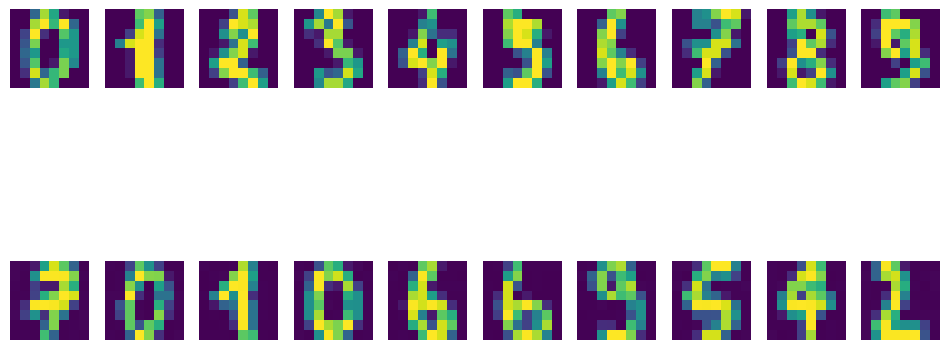

In [78]:
from sklearn.datasets import load_digits
X = load_digits().data
kde = KernelDensity(kernel='gaussian', bandwidth=0.05)
kde.fit(X)

# Générer 10 échantillons 

new_samples = kde.sample(10)


# Plot des vraies et fausses images 
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X[i].reshape(8, 8))
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.imshow(new_samples[i].reshape(8, 8))
    plt.axis('off')

plt.show()


Nous parvenons à créer des images de qualité similaire à celles du jeu de données d'origine, ce qui est particulièrement fascinant. Il est remarquable de constater que la méthode des noyaux, en raison de sa simplicité et de son coût de calcul abordable, peut être employée pour générer des images. Il faut noter quand meme que la distibution des images est assez facile à estimer.